In [122]:
import numpy as np
import pandas as pd

train_df_scaling = pd.read_csv("C:/Python_practice/DL_project/gwangjin_contest/EDA_and_Model/train_df_scaling.csv", index_col=0)
train_df_scaling

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,주차장과의최단거리,토지면적,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
지번주소,,,,,,,,
서울특별시 광진구 광장동 102,7067.7,136,2,51,2211.8,6324000.0,1144,41
서울특별시 광진구 광장동 104,7067.7,136,2,21,172.1,5097000.0,1166,41
서울특별시 광진구 광장동 105,7067.7,136,2,3,848.8,5202000.0,1068,41
서울특별시 광진구 광장동 106,7067.7,136,2,27,452.8,5097000.0,1038,41
서울특별시 광진구 광장동 107,7067.7,136,2,50,403.9,5793000.0,1011,42
...,...,...,...,...,...,...,...,...
서울특별시 광진구 화양동 95-5,52366.1,44,28,44,152.0,4346000.0,630,75
서울특별시 광진구 화양동 96-2,52366.1,44,31,52,165.0,4346000.0,630,75
서울특별시 광진구 화양동 97,52366.1,44,28,54,188.0,5095000.0,633,74


### 정규화 - 로그 변환
- 비대칭 분포 데이터를 정규 분포 형태에 가깝게 만들어 줌
- 로그 변환은 주로 양수 데이터에 대해 수행

In [123]:
def log_transform(dataframe, columns):
    for column in columns:
        filtered = dataframe[column][dataframe[column] > 0] # filter out negative or zero values
        dataframe[column] = np.log(filtered) # apply log transformation
    return dataframe

log_df = log_transform(train_df_scaling, train_df_scaling.columns)
log_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23213 entries, 서울특별시 광진구 광장동  102 to 서울특별시 광진구 화양동  99
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   인구밀도                  23208 non-null  float64
 1   총 사업체수                23212 non-null  float64
 2   반경 1km 이내 불법주정차 단속 수  23213 non-null  float64
 3   주차장과의최단거리             23148 non-null  float64
 4   토지면적                  23213 non-null  float64
 5   공시지가(원/면적)            23213 non-null  float64
 6   역과의최단거리               23213 non-null  float64
 7   반경 1km 이내 주차장수        23213 non-null  float64
dtypes: float64(8)
memory usage: 1.6+ MB


In [124]:
log_df.head(3)

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,주차장과의최단거리,토지면적,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
지번주소,,,,,,,,
서울특별시 광진구 광장동 102,8.86329,4.912655,0.693147,3.931826,7.701562,15.659862,7.042286,3.713572
서울특별시 광진구 광장동 104,8.86329,4.912655,0.693147,3.044522,5.148076,15.444163,7.061334,3.713572
서울특별시 광진구 광장동 105,8.86329,4.912655,0.693147,1.098612,6.743824,15.464554,6.973543,3.713572


In [125]:
log_df.dropna(inplace=True) # 로그 변환
log_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23142 entries, 서울특별시 광진구 광장동  102 to 서울특별시 광진구 화양동  99
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   인구밀도                  23142 non-null  float64
 1   총 사업체수                23142 non-null  float64
 2   반경 1km 이내 불법주정차 단속 수  23142 non-null  float64
 3   주차장과의최단거리             23142 non-null  float64
 4   토지면적                  23142 non-null  float64
 5   공시지가(원/면적)            23142 non-null  float64
 6   역과의최단거리               23142 non-null  float64
 7   반경 1km 이내 주차장수        23142 non-null  float64
dtypes: float64(8)
memory usage: 1.6+ MB


### 정규화 - 로버스트 스케일링
- 이상치에 덜 민감한 중앙값(median)과 사분위수(interquartile range, IQR)를 사용하여 데이터의 스케일을 조정

In [126]:
from sklearn.preprocessing import RobustScaler

# 로버스트 스케일러 객체 생성
robust_scaler = RobustScaler()

# 로버스트 스케일링 적용
log_and_robust_scaled_df = robust_scaler.fit_transform(log_df)

# 결과를 DataFrame으로 변환
log_and_robust_scaled_df = pd.DataFrame(log_and_robust_scaled_df, columns=log_df.columns, index = log_df.index)
log_and_robust_scaled_df.head(5)

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,주차장과의최단거리,토지면적,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
지번주소,,,,,,,,
서울특별시 광진구 광장동 102,-2.521585,0.970048,-3.841831,-0.394344,4.750394,0.848371,0.935792,-1.533522
서울특별시 광진구 광장동 104,-2.521585,0.970048,-3.841831,-1.301622,0.100054,0.128199,0.968199,-1.533522
서울특별시 광진구 광장동 105,-2.521585,0.970048,-3.841831,-3.291337,3.006187,0.196280,0.818840,-1.533522
서울특별시 광진구 광장동 106,-2.521585,0.970048,-3.841831,-1.044650,1.861811,0.128199,0.770367,-1.533522
서울특별시 광진구 광장동 107,-2.521585,0.970048,-3.841831,-0.414593,1.653681,0.555555,0.725527,-1.488403


In [127]:
log_and_robust_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23142 entries, 서울특별시 광진구 광장동  102 to 서울특별시 광진구 화양동  99
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   인구밀도                  23142 non-null  float64
 1   총 사업체수                23142 non-null  float64
 2   반경 1km 이내 불법주정차 단속 수  23142 non-null  float64
 3   주차장과의최단거리             23142 non-null  float64
 4   토지면적                  23142 non-null  float64
 5   공시지가(원/면적)            23142 non-null  float64
 6   역과의최단거리               23142 non-null  float64
 7   반경 1km 이내 주차장수        23142 non-null  float64
dtypes: float64(8)
memory usage: 1.6+ MB


In [130]:
log_and_robust_scaled_df.to_csv('C:/Python_practice/DL_project/gwangjin_contest/EDA_and_Model/2.LogAndRobustScaled_UMAP_Clustering/log_and_robust_scaled_df.csv')

## log변환 - 로버스트 스케일링 - umap - OPTICS

In [129]:
### UMAP 차원축소
import umap

# UMAP 객체 생성 및 매개 변수 설정 (n_neighbors, min_dist, n_components 등)
umap_reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0, 
    n_components=2,
    random_state=42,
    metric = '' # 군집 개수 늘리는 방식
)

# UMAP 적용
train_df_umap = umap_reducer.fit_transform(log_and_robust_scaled_df)

# 결과를 DataFrame으로 변환
train_df_umap = pd.DataFrame(train_df_umap, columns=['UMAP1', 'UMAP2'], index=log_and_robust_scaled_df.index)
train_df_umap

,UMAP1,UMAP2
지번주소,,
서울특별시 광진구 광장동 102,9.011013,2.594765
서울특별시 광진구 광장동 104,9.004245,2.733854
서울특별시 광진구 광장동 105,9.014873,2.601872
서울특별시 광진구 광장동 106,9.016152,2.702837
서울특별시 광진구 광장동 107,9.001335,2.710347
...,...,...
서울특별시 광진구 화양동 95-5,-0.070081,-1.305319
서울특별시 광진구 화양동 96-2,-0.090761,-1.448530
서울특별시 광진구 화양동 97,0.154422,-1.514005


### OPTICS 클러스터링 알고리즘

In [142]:
# 노이즈 포인트를 제외한 클러스터링 결과
def get_without_noise_optics(train_df_umap) :
    from sklearn.cluster import OPTICS

    # OPTICS 객체 생성 및 매개 변수 설정 (min_samples, xi, min_cluster_size 등)
    optics_clustering = OPTICS()

    # cluster_all 매개 변수 설정
    optics_clustering.cluster_all = False

    # UMAP으로 축소된 데이터(train_df_umap)에 OPTICS 적용
    optics_clustering.fit(train_df_umap)

    # 모델 저장
    import pickle

    with open("C:/Python_practice/DL_project/gwangjin_contest/EDA_and_Model/2.LogAndRobustScaled_UMAP_Clustering/LogAndRobustScaled_UMAP_OPTICS.pkl", "wb") as file:
        pickle.dump(optics_clustering, file)

    # 클러스터링 결과를 train_df_umap DataFrame에 추가
    train_df_umap['OPTICS_cluster_without_noise'] = optics_clustering.labels_
    train_df_umap = train_df_umap[train_df_umap['OPTICS_cluster_without_noise'] != -1]  # 노이즈 포인트 제거
    
    return train_df_umap

get_without_noise_optics = get_without_noise_optics(train_df_umap)
get_without_noise_optics

,UMAP1,UMAP2,OPTICS_cluster_without_noise
지번주소,,,
서울특별시 광진구 광장동 102,9.011013,2.594765,0
서울특별시 광진구 광장동 105,9.014873,2.601872,0
서울특별시 광진구 광장동 106,9.016152,2.702837,15
서울특별시 광진구 광장동 107,9.001335,2.710347,15
서울특별시 광진구 광장동 108,9.107546,2.596596,3
...,...,...,...
서울특별시 광진구 화양동 95-1,-0.036195,-1.261670,1049
서울특별시 광진구 화양동 95-5,-0.070081,-1.305319,1049
서울특별시 광진구 화양동 96-2,-0.090761,-1.448530,1061


In [145]:
get_without_noise_optics.to_csv('C:/Python_practice/DL_project/gwangjin_contest/EDA_and_Model/2.LogAndRobustScaled_UMAP_Clustering/OPTICS_cluster_without_noise.csv')

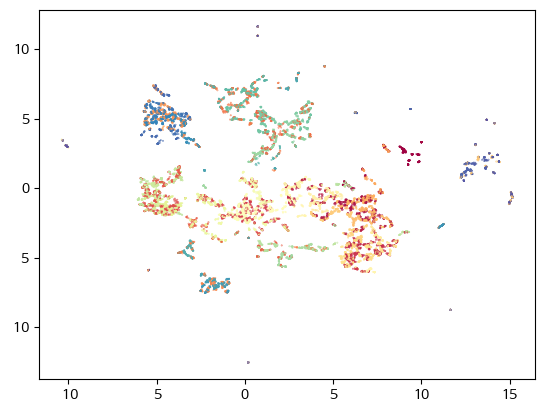

In [146]:
def visualization_data(clustering_result):
    # 노이즈 포인트 제외
    clustered = (clustering_result['OPTICS_cluster_without_noise'] >= 0)
    
    plt.scatter(clustering_result[clustered]['UMAP1'],
                clustering_result[clustered]['UMAP2'],
                c=clustering_result[clustered]['OPTICS_cluster_without_noise'],
                s=0.1,
                cmap='Spectral')
    plt.show()
    
get_without_noise_optics_v = visualization_data(get_without_noise_optics)
get_without_noise_optics_v

### 군집화 평가 

In [147]:
# 실루엣 점수 계산 함수
def silhouette(clustering_result) : 
    from sklearn.metrics import silhouette_score

    # 클러스터링 결과에서 노이즈 포인트 제외한 데이터와 클러스터 레이블 추출
    X = clustering_result[['UMAP1', 'UMAP2']]
    labels = clustering_result['OPTICS_cluster_without_noise']

    # 실루엣 점수 계산
    silhouette_avg = silhouette_score(X, labels)

    return silhouette_avg

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import DistanceMetric

# Dunn 지수 계산 함수
def dunn(clustering_result):
    dist = DistanceMetric.get_metric('euclidean')
    labels = clustering_result['OPTICS_cluster_without_noise']
    clusters = np.unique(labels)
    centroids = [np.mean(clustering_result.loc[labels==i, ['UMAP1', 'UMAP2']], axis=0) for i in clusters]
    max_intracluster_distances = [np.max(dist.pairwise(clustering_result.loc[labels==i, ['UMAP1', 'UMAP2']])) for i in clusters]
    min_intercluster_distances = []
    for i, c1 in enumerate(centroids):
        for j, c2 in enumerate(centroids):
            if i < j:
                dist_ij = dist.pairwise([c1, c2])[0][1]
                min_intercluster_distances.append(dist_ij)
    return np.min(min_intercluster_distances) / np.max(max_intracluster_distances)

# Calinski-Harabasz 지수 계산 함수
def calinski_harabasz(clustering_result):
    labels = clustering_result['OPTICS_cluster_without_noise']
    return calinski_harabasz_score(clustering_result[['UMAP1', 'UMAP2']], labels)

In [148]:
# Dunn 지수와 Calinski-Harabasz 지수 계산
sil_score = silhouette(get_without_noise_optics)
dunn_score = dunn(get_without_noise_optics)
ch_score = calinski_harabasz(get_without_noise_optics)

# 출력
print(f"실루엣 score: {sil_score}")
print(f"Dunn score: {dunn_score:.4f}")
print(f"Calinski-Harabasz score: {ch_score:.4f}")

C:\Users\dohee\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


실루엣 score: 0.42496082186698914
Dunn score: 0.0002
Calinski-Harabasz score: 213897.0933


<hr>

## log변환 - 로버스트 스케일링 - umap - hdbscan

In [149]:
log_and_robust_scaled_df = pd.read_csv('C:/Python_practice/DL_project/gwangjin_contest/EDA_and_Model/2.LogAndRobustScaled_UMAP_Clustering/log_and_robust_scaled_df.csv', index_col=0)
log_and_robust_scaled_df

,인구밀도,총 사업체수,반경 1km 이내 불법주정차 단속 수,주차장과의최단거리,토지면적,공시지가(원/면적),역과의최단거리,반경 1km 이내 주차장수
지번주소,,,,,,,,
서울특별시 광진구 광장동 102,-2.521585,0.970048,-3.841831,-0.394344,4.750394,0.848371,0.935792,-1.533522
서울특별시 광진구 광장동 104,-2.521585,0.970048,-3.841831,-1.301622,0.100054,0.128199,0.968199,-1.533522
서울특별시 광진구 광장동 105,-2.521585,0.970048,-3.841831,-3.291337,3.006187,0.196280,0.818840,-1.533522
서울특별시 광진구 광장동 106,-2.521585,0.970048,-3.841831,-1.044650,1.861811,0.128199,0.770367,-1.533522
서울특별시 광진구 광장동 107,-2.521585,0.970048,-3.841831,-0.414593,1.653681,0.555555,0.725527,-1.488403
...,...,...,...,...,...,...,...,...
서울특별시 광진구 화양동 95-5,0.539291,-0.081046,0.386382,-0.545304,-0.126127,-0.403988,-0.079144,-0.402768
서울특별시 광진구 화양동 96-2,0.539291,-0.081046,0.549455,-0.374489,0.023327,-0.403988,-0.079144,-0.402768
서울특별시 광진구 화양동 97,0.539291,-0.081046,0.386382,-0.335899,0.260984,0.126888,-0.071062,-0.427901


In [150]:
### UMAP 차원축소
import umap

# UMAP 객체 생성 및 매개 변수 설정 (n_neighbors, min_dist, n_components 등)
umap_reducer = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0, 
    n_components=2,
    random_state=42,
)

# UMAP 적용
train_df_umap = umap_reducer.fit_transform(log_and_robust_scaled_df)

# 결과를 DataFrame으로 변환
train_df_umap = pd.DataFrame(train_df_umap, columns=['UMAP1', 'UMAP2'], index=log_and_robust_scaled_df.index)
train_df_umap

,UMAP1,UMAP2
지번주소,,
서울특별시 광진구 광장동 102,9.011013,2.594765
서울특별시 광진구 광장동 104,9.004245,2.733854
서울특별시 광진구 광장동 105,9.014873,2.601872
서울특별시 광진구 광장동 106,9.016152,2.702837
서울특별시 광진구 광장동 107,9.001335,2.710347
...,...,...
서울특별시 광진구 화양동 95-5,-0.070081,-1.305319
서울특별시 광진구 화양동 96-2,-0.090761,-1.448530
서울특별시 광진구 화양동 97,0.154422,-1.514005


### HDBSCAN 알고리즘

In [160]:
# pip install hdbscan

In [162]:
# 노이즈 포인트를 제외한 클러스터링 결과
def get_without_noise_hdbscan(train_df_umap) :
    from hdbscan import HDBSCAN

    # HDBSCAN 객체 생성 및 매개 변수 설정 (min_cluster_size 등)
    hdbscan_clustering = HDBSCAN()

    # UMAP으로 축소된 데이터(train_df_umap)에 HDBSCAN 적용
    hdbscan_clustering.fit(train_df_umap)

    # 모델 저장
    import pickle

    with open("C:/Python_practice/DL_project/gwangjin_contest/EDA_and_Model/2.LogAndRobustScaled_UMAP_Clustering/LogAndRobustScaled_UMAP_HDBSCAN.pkl", "wb") as file:
        pickle.dump(hdbscan_clustering, file)


    # 클러스터링 결과를 train_df_umap DataFrame에 추가
    train_df_umap['HDBSCAN_cluster_without_noise'] = hdbscan_clustering.labels_
    train_df_umap = train_df_umap[train_df_umap['HDBSCAN_cluster_without_noise'] != -1]  # 노이즈 포인트 제거
    
    return train_df_umap

get_without_noise_hdbscan = get_without_noise_hdbscan(train_df_umap)
get_without_noise_hdbscan

,UMAP1,UMAP2,HDBSCAN_cluster_without_noise
지번주소,,,
서울특별시 광진구 광장동 102,9.011013,2.594765,88
서울특별시 광진구 광장동 105,9.014873,2.601872,88
서울특별시 광진구 광장동 106,9.016152,2.702837,171
서울특별시 광진구 광장동 107,9.001335,2.710347,171
서울특별시 광진구 광장동 108,9.107546,2.596596,94
...,...,...,...
서울특별시 광진구 화양동 95-1,-0.036195,-1.261670,649
서울특별시 광진구 화양동 96-2,-0.090761,-1.448530,632
서울특별시 광진구 화양동 97,0.154422,-1.514005,720


In [163]:
get_without_noise_hdbscan.to_csv('C:/Python_practice/DL_project/gwangjin_contest/EDA_and_Model/2.LogAndRobustScaled_UMAP_Clustering/HDBSCAN_cluster_without_noise.csv')

c:\Users\dohee\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


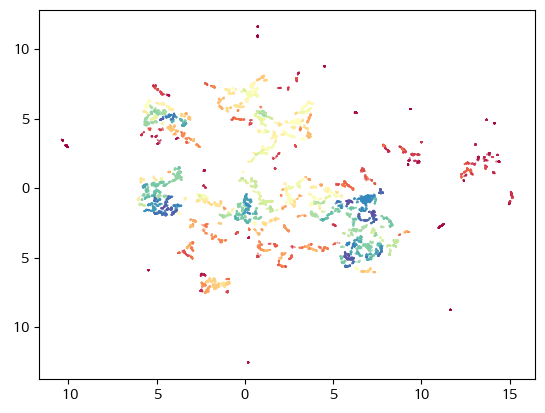

In [165]:
# 군집화 결과 시각화
def visualization_data(clustering_result):
    # 노이즈 포인트 제외
    clustered = (clustering_result['HDBSCAN_cluster_without_noise'] >= 0)
    
    plt.scatter(clustering_result[clustered]['UMAP1'],
                clustering_result[clustered]['UMAP2'],
                c=clustering_result[clustered]['HDBSCAN_cluster_without_noise'],
                s=0.1,
                cmap='Spectral')
    plt.show()
    
get_without_noise_hdbscan_v = visualization_data(get_without_noise_hdbscan)
get_without_noise_hdbscan_v

In [166]:
# 실루엣 점수 계산 함수
def silhouette(clustering_result) : 
    from sklearn.metrics import silhouette_score

    # 클러스터링 결과에서 노이즈 포인트 제외한 데이터와 클러스터 레이블 추출
    X = clustering_result.loc[clustering_result['HDBSCAN_cluster_without_noise'] != -1, ['UMAP1', 'UMAP2']]
    labels = clustering_result.loc[clustering_result['HDBSCAN_cluster_without_noise'] != -1, 'HDBSCAN_cluster_without_noise']

    # 실루엣 점수 계산
    silhouette_avg = silhouette_score(X, labels)

    return silhouette_avg

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import DistanceMetric

# Dunn 지수 계산 함수
def dunn(clustering_result):
    dist = DistanceMetric.get_metric('euclidean')
    labels = clustering_result['HDBSCAN_cluster_without_noise']
    clusters = np.unique(labels)
    centroids = [np.mean(clustering_result.loc[labels==i, ['UMAP1', 'UMAP2']], axis=0) for i in clusters]
    max_intracluster_distances = [np.max(dist.pairwise(clustering_result.loc[labels==i, ['UMAP1', 'UMAP2']])) for i in clusters]
    min_intercluster_distances = []
    for i, c1 in enumerate(centroids):
        for j, c2 in enumerate(centroids):
            if i < j:
                dist_ij = dist.pairwise([c1, c2])[0][1]
                min_intercluster_distances.append(dist_ij)
    return np.min(min_intercluster_distances) / np.max(max_intracluster_distances)

# Calinski-Harabasz 지수 계산 함수
def calinski_harabasz(clustering_result):
    labels = clustering_result['HDBSCAN_cluster_without_noise']
    return calinski_harabasz_score(clustering_result[['UMAP1', 'UMAP2']], labels)

# Dunn 지수와 Calinski-Harabasz 지수 계산
sil_score = silhouette(get_without_noise_hdbscan)
dunn_score = dunn(get_without_noise_hdbscan)
ch_score = calinski_harabasz(get_without_noise_hdbscan)

# 출력
print(f"실루엣 score: {sil_score}")
print(f"Dunn score: {dunn_score:.4f}")
print(f"Calinski-Harabasz score: {ch_score:.4f}")

C:\Users\dohee\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


실루엣 score: 0.6167325377464294
Dunn score: 0.0019
Calinski-Harabasz score: 146216.0571


<hr>

In [40]:
def silhouette(clustering_result) : 
    from sklearn.metrics import silhouette_score

    # 클러스터링 결과에서 노이즈 포인트 제외한 데이터와 클러스터 레이블 추출
    X = clustering_result[['UMAP1', 'UMAP2']]
    labels = clustering_result['OPTICS_cluster_without_noise']

    # 실루엣 점수 계산
    silhouette_avg = silhouette_score(X, labels)

    return silhouette_avg

Dunn 지수 (군집화의 일관성) :
- 군집 내의 응집도와 군집 간 분리도를 모두 고려하여 군집화의 품질을 평가
- 클러스터 내 거리와 클러스터 간 거리의 비율을 이용해 계산
- Dunn 지수: Dunn 지수가 0.7 이상 = 잘 분리된 클러스터가 형성 => 클러스터링 결과가 좋다고 평가<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;= Dunn 지수가 작다는 것은 각 클러스터 간의 거리가 가깝지 않다

In [37]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import DistanceMetric

# Dunn 지수 계산 함수
def dunn(clustering_result):
    dist = DistanceMetric.get_metric('euclidean')
    labels = clustering_result['OPTICS_cluster_without_noise']
    clusters = np.unique(labels)
    centroids = [np.mean(clustering_result.loc[labels==i, ['UMAP1', 'UMAP2']], axis=0) for i in clusters]
    max_intracluster_distances = [np.max(dist.pairwise(clustering_result.loc[labels==i, ['UMAP1', 'UMAP2']])) for i in clusters]
    min_intercluster_distances = []
    for i, c1 in enumerate(centroids):
        for j, c2 in enumerate(centroids):
            if i < j:
                dist_ij = dist.pairwise([c1, c2])[0][1]
                min_intercluster_distances.append(dist_ij)
    return np.min(min_intercluster_distances) / np.max(max_intracluster_distances)

Calinski-Harabasz 지수 (군집화의 분리력) :
- 군집화 결과가 실제로 잘 분리되어 있는지를 판단하는 지표
- 각 군집의 분산이 커질수록, 각 군집 간의 거리가 멀어질수록 높은 값
- Calinski-Harabasz 지수:  100-1000 사이의 값이 좋은 성능

In [38]:
# Calinski-Harabasz 지수 계산 함수
def calinski_harabasz(clustering_result):
    labels = clustering_result['OPTICS_cluster_without_noise']
    return calinski_harabasz_score(clustering_result[['UMAP1', 'UMAP2']], labels)

In [41]:
# Dunn 지수와 Calinski-Harabasz 지수 계산
sil_score = silhouette(get_without_noise_optics)
dunn_score = dunn(get_without_noise_optics)
ch_score = calinski_harabasz(get_without_noise_optics)

# 출력
print(f"실루엣 score: {sil_score}")
print(f"Dunn score: {dunn_score:.4f}")
print(f"Calinski-Harabasz score: {ch_score:.4f}")

C:\Users\dohee\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


실루엣 score: 0.42767760157585144
Dunn score: 0.0003
Calinski-Harabasz score: 529042.2005


---------- MinMaxScaled_UMAP_OPTICS_v2 (umap 하이퍼파라미터 조정)
<hr>

# MinMaxScaled_UMAP_OPTICS_v3 
(OPTICS 하이퍼마라미터 조정)

### 1) 노이즈 제거하지 않은 클러스터링 결과

In [48]:
from sklearn.cluster import OPTICS
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

# 최적의 파라미터 조합을 찾기 위한 그리드 탐색
param_grid = {
    'min_samples': [5, 10, 15],
    'max_eps': [0.5, 1.0, 1.5],
    'cluster_method': ['xi', 'dbscan']
}

best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    optics_clustering = OPTICS(
        min_samples=params['min_samples'],
        max_eps=params['max_eps'],
        cluster_method=params['cluster_method']
    )
    optics_clustering.cluster_all = True
    optics_clustering.fit(train_df_umap)
    train_df_umap['OPTICS_cluster_all_v3'] = optics_clustering.labels_
    
    # 클러스터가 하나도 생성되지 않은 경우, 스코어 계산을 건너뜀
    if len(set(optics_clustering.labels_)) == 1 and -1 in set(optics_clustering.labels_):
        continue
    
    # 실루엣 점수를 사용하여 클러스터링 성능 평가
    score = silhouette_score(train_df_umap, optics_clustering.labels_)
    if score > best_score:
        best_score = score
        best_params = params

print(f"Best score: {best_score}")
print(f"Best params: {best_params}")

Best score: 0.9766646495506439
Best params: {'cluster_method': 'dbscan', 'max_eps': 1.0, 'min_samples': 5}


최적의 파라미터로 진행한 final 클러스터링 결과

In [ ]:
# 최적의 파라미터를 사용하여 OPTICS 객체 생성 및 매개 변수 설정
optics_clustering_final = OPTICS(
    min_samples=best_params['min_samples'],
    max_eps=best_params['max_eps'],
    cluster_method=best_params['cluster_method']
)

# cluster_all 매개 변수 설정
optics_clustering_final.cluster_all = True

# UMAP으로 축소된 데이터(train_df_umap)에 OPTICS 적용
optics_clustering_final.fit(train_df_umap)

# 클러스터링 결과를 train_df_umap DataFrame에 추가
train_df_umap['gridsearch_cluster_all'] = optics_clustering_final.labels_

In [59]:
# 결과 확인
train_df_umap.head()

,UMAP1,UMAP2,OPTICS_cluster_all,OPTICS_cluster_without_noise,gridsearch_cluster_all
지번주소,,,,,
서울특별시 광진구 광장동 102,-7.080091,-8.377981,0,0,0
서울특별시 광진구 광장동 104,-7.059165,-8.374187,-1,1,1
서울특별시 광진구 광장동 105,-7.029389,-8.410781,-1,1,1
서울특별시 광진구 광장동 106,-7.060771,-8.380552,-1,1,1
서울특별시 광진구 광장동 107,-7.058254,-8.383424,-1,1,1


In [60]:
# 실루엣 점수 계산 함수
def silhouette(clustering_result) : 
    from sklearn.metrics import silhouette_score

    # 클러스터링 결과에서 노이즈 포인트 제외한 데이터와 클러스터 레이블 추출
    X = clustering_result.loc[clustering_result['gridsearch_cluster_all'] != -1, ['UMAP1', 'UMAP2']]
    labels = clustering_result.loc[clustering_result['gridsearch_cluster_all'] != -1, 'gridsearch_cluster_all']

    # 실루엣 점수 계산
    silhouette_avg = silhouette_score(X, labels)

    return silhouette_avg

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import DistanceMetric

# Dunn 지수 계산 함수
def dunn(clustering_result):
    dist = DistanceMetric.get_metric('euclidean')
    labels = clustering_result['gridsearch_cluster_all']
    clusters = np.unique(labels)
    centroids = [np.mean(clustering_result.loc[labels==i, ['UMAP1', 'UMAP2']], axis=0) for i in clusters]
    max_intracluster_distances = [np.max(dist.pairwise(clustering_result.loc[labels==i, ['UMAP1', 'UMAP2']])) for i in clusters]
    min_intercluster_distances = []
    for i, c1 in enumerate(centroids):
        for j, c2 in enumerate(centroids):
            if i < j:
                dist_ij = dist.pairwise([c1, c2])[0][1]
                min_intercluster_distances.append(dist_ij)
    return np.min(min_intercluster_distances) / np.max(max_intracluster_distances)

# Calinski-Harabasz 지수 계산 함수
def calinski_harabasz(clustering_result):
    labels = clustering_result['gridsearch_cluster_all']
    return calinski_harabasz_score(clustering_result[['UMAP1', 'UMAP2']], labels)

In [61]:
# Dunn 지수와 Calinski-Harabasz 지수 계산
sil_score = silhouette(train_df_umap)
dunn_score = dunn(train_df_umap)
ch_score = calinski_harabasz(train_df_umap)

# 출력
print(f"실루엣 score: {sil_score}")
print(f"Dunn score: {dunn_score:.4f}")
print(f"Calinski-Harabasz score: {ch_score:.4f}")

C:\Users\dohee\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


실루엣 score: 0.2766619324684143
Dunn score: 0.0000
Calinski-Harabasz score: 1111.2256


In [62]:
import pickle

# 모델 저장하기
with open("MinMaxScaled_UMAP_dbscan_gridsearch.pkl", "wb") as file:
    pickle.dump(optics_clustering_final, file)

In [64]:
# 모델 저장 경로 확인
import os

current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: c:\Python_practice\DL_project\gwangjin_contest\EDA_and_Model


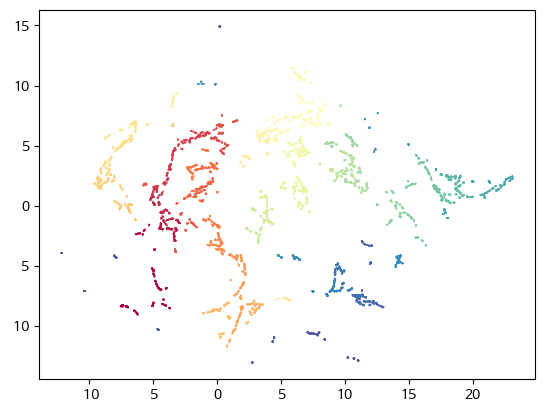

In [65]:
def visualization_data(clustering_result):
    # 노이즈 포인트 제외
    clustered = (clustering_result['OPTICS_cluster_all'] >= 0)
    
    plt.scatter(clustering_result[clustered]['UMAP1'],
                clustering_result[clustered]['UMAP2'],
                c=clustering_result[clustered]['OPTICS_cluster_all'],
                s=0.1,
                cmap='Spectral')
    plt.show()
    
girdsearch_result = visualization_data(train_df_umap)
girdsearch_result

### 2) 노이즈 제거한 클러스터링 결과 (db 스캔으로 진행)

In [84]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import silhouette_score

# 최적의 파라미터 조합을 찾기 위한 그리드 탐색
param_grid = {
    'eps': [0.5, 1.0, 1.5],
    'min_samples': [5, 10, 15],
}
best_score = -1
best_params = None

for params in ParameterGrid(param_grid):
    dbscan_clustering = DBSCAN(
        eps=params['eps'],
        min_samples=params['min_samples'],
    )
    dbscan_clustering.fit(train_df_umap)

    # 클러스터가 하나도 생성되지 않은 경우, 스코어 계산을 건너뜀
    if len(set(dbscan_clustering.labels_)) == 1 and -1 in set(dbscan_clustering.labels_):
        continue
    
    # 실루엣 점수를 사용하여 클러스터링 성능 평가
    score = silhouette_score(train_df_umap, dbscan_clustering.labels_)
    if score > best_score:
        best_score = score
        best_params = params

print(f"Best score: {best_score}")
print(f"Best params: {best_params}")

Best score: 0.9808876826771457
Best params: {'eps': 1.0, 'min_samples': 5}


최적의 파라미터로 진행한 final 클러스터링 결과

In [85]:
# 최적의 파라미터를 사용하여 OPTICS 객체 생성 및 매개 변수 설정
dbscan_clustering_final = DBSCAN(
    eps=best_params['eps'],
    min_samples=best_params['min_samples']
)

# UMAP으로 축소된 데이터(train_df_umap)에 OPTICS 적용
dbscan_clustering_final.fit(train_df_umap)

# 클러스터링 결과를 train_df_umap DataFrame에 추가
train_df_umap['gridsearch_cluster_without_noise'] = dbscan_clustering_final.labels_

In [86]:
# 결과 확인
train_df_umap.head(3)

,UMAP1,UMAP2,OPTICS_cluster_all,OPTICS_cluster_without_noise,gridsearch_cluster_all,gridsearch_cluster_without_noise
지번주소,,,,,,
서울특별시 광진구 광장동 102,-7.080091,-8.377981,0,0,0,0
서울특별시 광진구 광장동 104,-7.059165,-8.374187,-1,1,1,1
서울특별시 광진구 광장동 105,-7.029389,-8.410781,-1,1,1,1


In [87]:
# 실루엣 점수 계산 함수
def silhouette(clustering_result) : 
    from sklearn.metrics import silhouette_score

    # 클러스터링 결과에서 노이즈 포인트 제외한 데이터와 클러스터 레이블 추출
    X = clustering_result.loc[clustering_result['gridsearch_cluster_without_noise'] != -1, ['UMAP1', 'UMAP2']]
    labels = clustering_result.loc[clustering_result['gridsearch_cluster_without_noise'] != -1, 'gridsearch_cluster_without_noise']

    # 실루엣 점수 계산
    silhouette_avg = silhouette_score(X, labels)

    return silhouette_avg

from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import DistanceMetric

# Dunn 지수 계산 함수
def dunn(clustering_result):
    dist = DistanceMetric.get_metric('euclidean')
    labels = clustering_result['gridsearch_cluster_without_noise']
    clusters = np.unique(labels)
    centroids = [np.mean(clustering_result.loc[labels==i, ['UMAP1', 'UMAP2']], axis=0) for i in clusters]
    max_intracluster_distances = [np.max(dist.pairwise(clustering_result.loc[labels==i, ['UMAP1', 'UMAP2']])) for i in clusters]
    min_intercluster_distances = []
    for i, c1 in enumerate(centroids):
        for j, c2 in enumerate(centroids):
            if i < j:
                dist_ij = dist.pairwise([c1, c2])[0][1]
                min_intercluster_distances.append(dist_ij)
    return np.min(min_intercluster_distances) / np.max(max_intracluster_distances)

# Calinski-Harabasz 지수 계산 함수
def calinski_harabasz(clustering_result):
    labels = clustering_result['gridsearch_cluster_without_noise']
    return calinski_harabasz_score(clustering_result[['UMAP1', 'UMAP2']], labels)

# Dunn 지수와 Calinski-Harabasz 지수 계산
sil_score = silhouette(train_df_umap)
dunn_score = dunn(train_df_umap)
ch_score = calinski_harabasz(train_df_umap)

# 출력
print(f"실루엣 score: {sil_score}")
print(f"Dunn score: {dunn_score:.4f}")
print(f"Calinski-Harabasz score: {ch_score:.4f}")

C:\Users\dohee\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


실루엣 score: 0.2836548686027527
Dunn score: 0.0000
Calinski-Harabasz score: 2240.3750


c:\Users\dohee\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


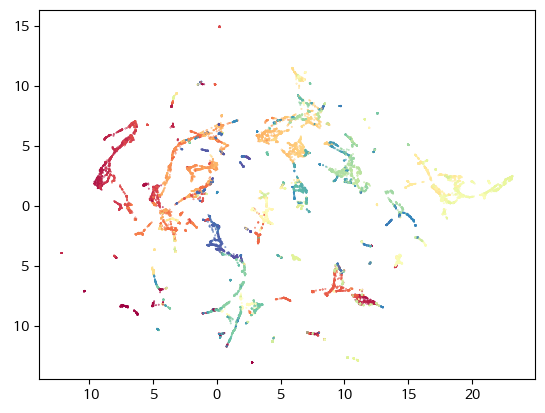

In [88]:
def visualization_data(clustering_result):
    # 노이즈 포인트 제외
    clustered = (clustering_result['gridsearch_cluster_without_noise'] >= 0)
    
    plt.scatter(clustering_result[clustered]['UMAP1'],
                clustering_result[clustered]['UMAP2'],
                c=clustering_result[clustered]['gridsearch_cluster_without_noise'],
                s=0.1,
                cmap='Spectral')
    plt.show()
    
girdsearch_result_2 = visualization_data(train_df_umap)
girdsearch_result_2